<a href="https://colab.research.google.com/github/TharuniDhadi/codeclause-DSP1/blob/main/creditcard__fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection using Machine learning
As this is a binary classification problem we will be using Logistic Regression model for model training

# **Workflow of model**


* Collection of data   
* Data Preprocessing  
* Splitting test and training data
* Model Training  
*   Model Evaluation
*   Prediction System






### Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Loading dataset into data frame

In [4]:
# importing data

transaction_dataset= pd.read_csv("/content/creditcard.csv")
transaction_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [5]:
# last 5 rows

transaction_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11954,20631,1.504204,-0.411728,0.200090,-0.778753,-0.442232,-0.119677,-0.782660,-0.165178,0.691819,...,-0.136231,-0.217274,-0.143260,-1.057332,0.529188,-0.235062,-0.012089,0.000905,9.00,0.0
11955,20636,1.134994,0.096340,0.277921,0.319692,0.742800,1.611803,-0.458649,0.390012,1.424541,...,-0.395605,-0.743542,0.222256,-1.859104,-0.109777,0.279049,0.012398,-0.009090,0.99,0.0
11956,20638,-6.305012,3.944886,-4.707362,1.539602,-3.934785,-1.730565,-2.104936,3.843447,0.863458,...,0.073140,-0.039935,-0.108896,0.691434,-0.261979,-0.447540,0.212900,-0.031021,89.99,0.0
11957,20638,1.161960,-0.398297,1.123732,-0.474237,-1.226667,-0.519325,-0.804179,0.070134,3.262926,...,-0.121191,0.097255,0.050903,0.330479,0.315692,-0.712765,0.073836,0.028055,11.85,0.0
11958,20642,1.291096,-0.226628,0.708386,-0.719236,-0.659099,-0.273757,-0.612042,-0.111488,3.032258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Analysis

In [6]:
# check shape of dataset

transaction_dataset.shape

# dataset has 73377 rows and 31 columns

(11959, 31)

In [7]:

# dataset information

transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [8]:
# dataset datatype

transaction_dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [9]:
# mathematical values of dataset

transaction_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,...,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,...,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,...,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,...,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,...,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,...,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [10]:
# finding null values in dataset

transaction_dataset.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:
# total null values in all rows and columns

transaction_dataset.isnull().sum().sum()

# hence there are total 28 null values

11

In [12]:
# distribution of legit transaction and fraudulent transaction

transaction_dataset['Class'].value_counts()

# data is highly unbalanced


0.0    11906
1.0       52
Name: Class, dtype: int64

## **Seperating data for analysis**

*   0 : Normal transaction
*   1 : Fraudulent transaction




In [13]:
legit = transaction_dataset[transaction_dataset.Class == 0]
fraud = transaction_dataset[transaction_dataset.Class == 1]


In [14]:
print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (11906, 31)
Shape of fraud :  (52, 31)


In [15]:
# measures

legit.Amount.describe()


count    11906.000000
mean        62.198127
std        177.379105
min          0.000000
25%          5.292500
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()
# fraud transaction description


count      52.000000
mean       97.724808
std       321.188775
min         0.000000
25%         1.000000
50%         1.000000
75%         1.772500
max      1809.680000
Name: Amount, dtype: float64

In [17]:
# comparing the values for both transaction

transaction_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7993.389048,-0.200839,0.259753,0.929229,0.255987,-0.076685,0.149326,-0.097364,-0.053087,0.927305,...,0.020836,-0.063076,-0.154427,-0.032369,0.018962,0.105861,0.061825,0.005330,0.000012,62.198127
1.0,11569.615385,-3.769104,4.258027,-8.202329,6.396396,-2.342431,-1.990562,-5.740207,0.950650,-2.729769,...,0.411236,0.305259,-0.021762,-0.340563,-0.406311,-0.139505,0.306967,0.692927,0.059751,97.724808


# **Under-Sampling**

 * build a sample dataset having similar distribution of normal and fraudulent transactions.
 * number of fraudulent transaction is = 492



In [18]:
ligit_sample = transaction_dataset.sample(n = 492)


### **Concatinating two samplings**

In [20]:
new_transaction_dataset2 = pd.concat([ligit_sample, fraud], axis = 0)


In [21]:
new_transaction_dataset2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9952,14815,-0.427615,0.987858,1.519170,-0.678824,-0.090581,-1.273150,0.674926,-0.255767,1.076965,...,0.021988,0.458079,-0.092440,0.748920,-0.496904,0.832352,0.279384,0.207704,2.17,0.0
5144,4847,0.219716,0.550285,2.003861,1.327341,-0.180133,0.445030,-0.013365,-0.063338,1.858763,...,-0.050647,0.596061,0.165825,0.036855,-1.310187,-0.584814,0.105937,-0.036183,9.99,0.0
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.00,1.0
853,648,1.258778,-0.059313,0.314052,-0.111067,-0.503006,-0.704089,-0.156473,-0.051544,0.369292,...,-0.092730,-0.249496,0.086934,0.124848,0.141429,0.992693,-0.072256,-0.001743,0.77,0.0
10001,15014,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,...,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,3.79,0.0


In [22]:
new_transaction_dataset2.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10897,18690,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.0,1.0
11343,19762,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1.0,1.0
11710,20011,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.0,1.0
11841,20332,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,...,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1.0,1.0
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.0,1.0


In [23]:
new_transaction_dataset2['Class'].value_counts()

0.0    491
1.0     53
Name: Class, dtype: int64

In [24]:
new_transaction_dataset2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7775.097760,-0.198460,0.221462,0.960744,0.339901,-0.120439,0.100613,-0.119660,-0.149031,0.920610,...,0.024153,0.025390,-0.168988,-0.040959,0.037645,0.106558,0.058086,0.047344,-0.005303,70.414440
1.0,11737.188679,-3.996464,4.343272,-8.477845,6.499574,-2.469789,-1.998040,-5.944361,0.950606,-2.797333,...,0.422199,0.255148,-0.001797,-0.312702,-0.418332,-0.138928,0.313579,0.720163,0.031983,95.899811


## **Data Visualization**

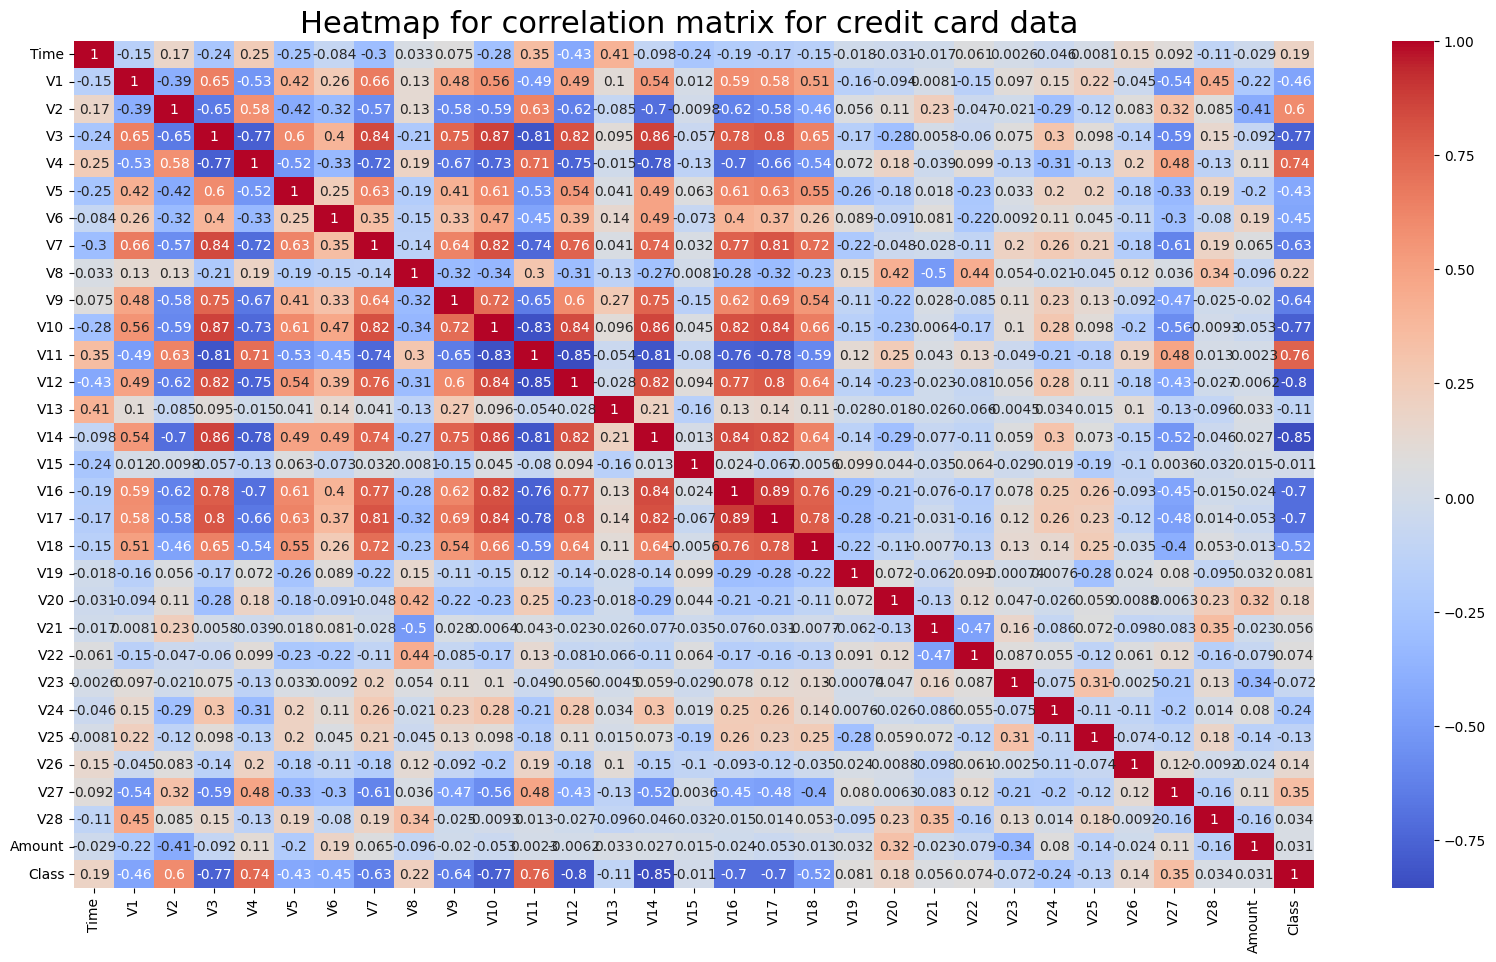

In [25]:
plt.figure(figsize = (20,11))
# heatmap size in ration 16:9

sns.heatmap(new_transaction_dataset2.corr(), annot = True, cmap = 'coolwarm')
# heatmap parameters

plt.title("Heatmap for correlation matrix for credit card data ", fontsize = 22)
plt.show()

### **Splitting the data into features and Targets**

In [28]:
#Splitting the data into features and Targets
X = new_transaction_dataset2.drop(columns = 'Class', axis = 1)
Y = new_transaction_dataset2['Class']


In [29]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9952,14815,-0.427615,0.987858,1.519170,-0.678824,-0.090581,-1.273150,0.674926,-0.255767,1.076965,...,-0.005343,0.021988,0.458079,-0.092440,0.748920,-0.496904,0.832352,0.279384,0.207704,2.17
5144,4847,0.219716,0.550285,2.003861,1.327341,-0.180133,0.445030,-0.013365,-0.063338,1.858763,...,-0.038503,-0.050647,0.596061,0.165825,0.036855,-1.310187,-0.584814,0.105937,-0.036183,9.99
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,0.992279,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.00
853,648,1.258778,-0.059313,0.314052,-0.111067,-0.503006,-0.704089,-0.156473,-0.051544,0.369292,...,-0.156057,-0.092730,-0.249496,0.086934,0.124848,0.141429,0.992693,-0.072256,-0.001743,0.77
10001,15014,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,...,-0.134542,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,3.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10897,18690,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,1.111502,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00
11343,19762,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1.00
11710,20011,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,0.996469,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.00
11841,20332,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,...,0.993121,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1.00


In [30]:
Y

9952     0.0
5144     0.0
11880    1.0
853      0.0
10001    0.0
        ... 
10897    1.0
11343    1.0
11710    1.0
11841    1.0
11880    1.0
Name: Class, Length: 544, dtype: float64

### **Splitting the data into training and testing data**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)


In [32]:
print("Shape of X_train ", X_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_train ", Y_train.shape)
print("Shape of Y_test ", Y_test.shape)

Shape of X_train  (435, 30)
Shape of X_test  (109, 30)
Shape of Y_train  (435,)
Shape of Y_test  (109,)


### **Model Training**

In [33]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **Model Evaluation**

*  Accuracy Score




In [34]:
# accuracy on training data

X_train_prediction = model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print("Accuracy on Training data ",traning_data_accuracy)

Accuracy on Training data  0.9954022988505747


In [37]:
# accuracy on testing data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print("Accuracy on Training data ",test_data_accuracy)

Accuracy on Training data  0.944954128440367
